In [1]:
!wget -nd http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/20130502.phase3.sequence.index -O sequence.index

--2025-01-23 12:52:26--  http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/20130502.phase3.sequence.index
193.62.193.1671000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 
connected. to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.193.167|:80... 
200 OKequest sent, awaiting response... 
Length: 67057948 (64M)
Saving to: ‘sequence.index’

sequence.index      100%[===================>]  63.95M   721KB/s    in 91s     

2025-01-23 12:53:58 (717 KB/s) - ‘sequence.index’ saved [67057948/67057948]



In [63]:
import os
from IPython.display import Image
import rpy2.robjects.lib.ggplot2 as ggplot2
from rpy2.robjects.functions import SignatureTranslatedFunction
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
%load_ext rpy2.ipython

In [49]:
read_delim = ro.r('read.delim') # The R language specification allows you to put dots 
# in the names of objects. Therefore, we have to convert a function name into read_delim.
seq_data = read_delim('sequence.index', header=True, stringsAsFactors=False) #In R: seq.data <- read.delim(...)


In [50]:
print('This dataframe has %d columns and %d rows' %(seq_data.ncol, seq_data.nrow))
print(seq_data.colnames)

This dataframe has 26 columns and 187720 rows
 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "PAIRED_FASTQ"        "WITHDRAWN"          
[22] "WITHDRAWN_DATE"      "COMMENT"             "READ_COUNT"         
[25] "BASE_COUNT"          "ANALYSIS_GROUP"     



In [51]:
my_cols = ro.r.ncol(seq_data)
print(my_cols)
print(my_cols[0])
print(type(my_cols))
print(type(my_cols[0]))

[1] 26

26
<class 'rpy2.robjects.vectors.IntVector'>
<class 'int'>


In [52]:
as_integer = ro.r('as.integer')
match = ro.r.match
my_col = match('READ_COUNT', seq_data.colnames)[0] # vector returned
print(my_col)
print('Type of read count before as.integer: %s' % seq_data[my_col - 1].rclass[0])
seq_data[my_col - 1] = as_integer(seq_data[my_col - 1])
print('Type of read count after as.integer: %s' % seq_data[my_col - 1].rclass[0])

24
Type of read count before as.integer: character
Type of read count after as.integer: integer


The match function is somewhat similar to the index method in Python lists. As expected, it returns a vector so that we can extract the 0 element. It’s also 1-indexed, so we subtract 1 when working on Python.

In [53]:
#This will create a variable in the R namespace called seq.data, with the content of the
#DataFrame from the Python namespace. Note that after this operation, both objects will be independent
ro.r.assign('seq.data', seq_data)

FASTQ_FILE,MD5,RUN_ID,...,READ_COUNT,BASE_COUNT,ANALYSIS_GROUP
'data/NA1...,'3b092ef1...,'ERR000018',...,9280498,'334097928','high cov...
'data/NA1...,'fcb89b0a...,'ERR000019',,9571982,'344591352','high cov...
'data/NA1...,'dcd4ff7d...,'ERR000020',,149044,'5365584','high cov...
'data/NA1...,'fb5d7eb5...,'ERR000020',,2057690,'74076840','high cov...
...,...,...,,...,...,...
'data/HG0...,'25947403...,'SRR824935',,2173448,'165182048','exome'
'data/HG0...,'1176aaea...,'SRR824936',,10250,'779000','exome'
'data/HG0...,'4ae5b931...,'SRR824936',,2403340,'182653840','exome'
'data/HG0...,'f87ba955...,'SRR824936',,2403340,'182653840','exome'


In [54]:
#This line is customizing the way Python interacts with the R function ggplot2::theme() using SignatureTranslatedFunction.
#The argument translation (init_prm_translate) maps the Python-style argument axis_text_x to R's axis.text.x.
ggplot2.theme = SignatureTranslatedFunction(ggplot2.theme, init_prm_translate = {'axis_text_x': 'axis.text.x'})
#ggplot2.aes_string(x='CENTER_NAME'): Maps the variable CENTER_NAME (a column in seq_data) to the x-axis. 
bar = ggplot2.ggplot(seq_data) + ggplot2.geom_bar() + ggplot2.aes_string(x='CENTER_NAME') + ggplot2.theme(axis_text_x=ggplot2.element_text(angle=90, hjust=1))
ro.r.png('out.png', type='cairo-png')
ro.r.png('out.png', type='cairo-png')
bar.plot()
dev_off = ro.r('dev.off')
dev_off()


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: NAs introduced by coercion 



2


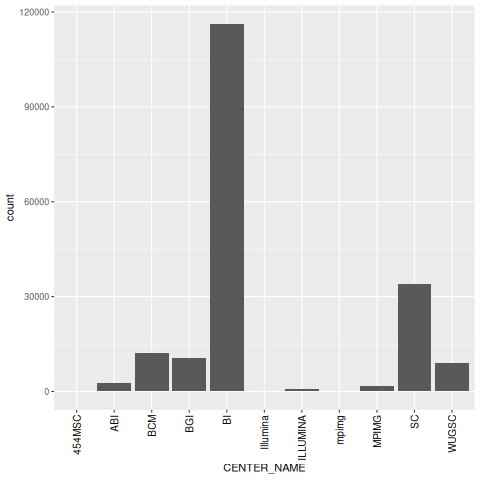

In [55]:
Image(filename='out.png')

In [56]:
# yri_ceu <-: This creates a new R object called yri_ceu to store the filtered data.
# seq.data$POPULATION %in% c("YRI", "CEU"):
# Filters rows where the POPULATION column contains either "YRI" or "CEU".
# %in% is used in R to match values in a column against a set of values.
ro.r('yri_ceu <- seq.data[seq.data$POPULATION %in% c("YRI", "CEU") & seq.data$BASE_COUNT < 2E9 & seq.data$READ_COUNT < 3E7, ]')
#This line retrieves the R object yri_ceu and assigns it to the Python variable yri_ceu
yri_ceu = ro.r('yri_ceu')

In [57]:
scatter = ggplot2.ggplot(yri_ceu) + ggplot2.aes_string(x='BASE_COUNT', y='READ_COUNT',shape='factor(POPULATION)', col='factor(ANALYSIS_GROUP)') + ggplot2.geom_point()
ro.r.png('out_scatter.png')
scatter.plot()
ro.r('dev.off()')

2


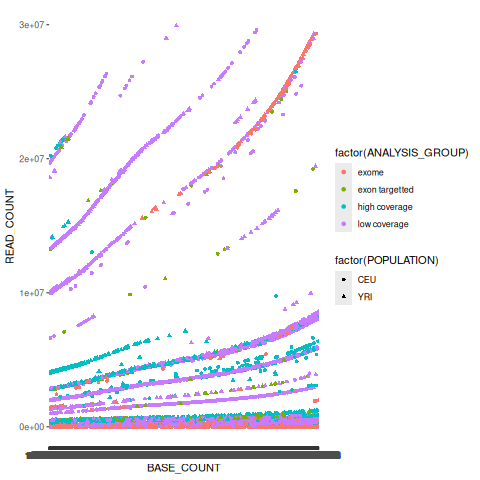

In [58]:
Image(filename='out_scatter.png')

In [62]:
"""
We are converting the R DataFrame (note that we are converting yri_ceu in the R namespace, 
not the one on the Python namespace). We delete the column that indicates the name of the 
paired FASTQ file on the pandas DataFrame and copy it back to the R namespace.
"""
with localconverter(ro.default_converter + pandas2ri.converter):
    pd_yri_ceu = ro.conversion.rpy2py(yri_ceu)
del pd_yri_ceu['PAIRED_FASTQ']
with localconverter(ro.default_converter + pandas2ri.converter):
    no_paired = ro.conversion.py2rpy(pd_yri_ceu)
ro.r.assign('no.paired', no_paired)
ro.r("print(colnames(no.paired))")

 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "WITHDRAWN"           "WITHDRAWN_DATE"     
[22] "COMMENT"             "READ_COUNT"          "BASE_COUNT"         
[25] "ANALYSIS_GROUP"     


**This recipe is an aggressive simplification of the previous one because it illustrates the conciseness and elegance of R magics**

In [64]:
import rpy2.robjects as robjects
import rpy2.robjects.lib.ggplot2 as ggplot2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [65]:
%%R
seq.data <- read.delim('sequence.index', header=TRUE, stringsAsFactors=FALSE)
seq.data$READ_COUNT <- as.integer(seq.data$READ_COUNT)
seq.data$BASE_COUNT <- as.integer(seq.data$BASE_COUNT)

In addition: Warning messages:
1: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages
2: In (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  :
  NAs introduced by coercion
3: In (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  :
  NAs introduced by coercion
4: In (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  :
  NAs introduced by coercion to integer range


# **Performing R magic with Jupyter**
**Jupyter provides quite a few extra features compared to standard Python. Among those features, it provides a framework of extensible commands called magics (actually, this only works with the IPython kernel of Jupyter since it is actually an IPython feature, but that is the one we are concerned with). Magics allow you to extend the language in many useful ways. There are magic functions that you can use to deal with R. As you will see in our example, it makes R interfacing much easier and more declarative. This recipe will not introduce any new R functionalities, but hopefully, it will make it clear how IPython can be an important productivity boost for scientific computing in this regard.**

**Note that % starts an IPython-specific directive. Just as a simple example, you can write %R
print(c(1, 2)) onto a Jupyter cell.Then, you can specify that the entire cell should be interpreted as R code by using %%R (note the double %%).**

In [75]:
%R print(c(1, 2))
ex = %R c(1, 2)
print(type(ex))

[1] 1 2
<class 'numpy.ndarray'>


In [67]:
seq_data = %R seq.data
print(type(seq_data))# pandas dataframe!

<class 'pandas.core.frame.DataFrame'>


**We can now transfer the variable to the Python namespace. The type of the DataFrame is not a standard Python object, but a pandas DataFrame. This is a departure from previous versions of the R magic interface.**

In [70]:
my_col = list(seq_data.columns).index("CENTER_NAME")
seq_data['CENTER_NAME'] = seq_data['CENTER_NAME'].apply(lambda x: x.upper())

**As we have a pandas DataFrame, we can operate on it quite easily using the pandas interface**

In [71]:
%R -i seq_data
%R print(colnames(seq_data))

 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "PAIRED_FASTQ"        "WITHDRAWN"          
[22] "WITHDRAWN_DATE"      "COMMENT"             "READ_COUNT"         
[25] "BASE_COUNT"          "ANALYSIS_GROUP"     


array(['FASTQ_FILE', 'MD5', 'RUN_ID', 'STUDY_ID', 'STUDY_NAME',
       'CENTER_NAME', 'SUBMISSION_ID', 'SUBMISSION_DATE', 'SAMPLE_ID',
       'SAMPLE_NAME', 'POPULATION', 'EXPERIMENT_ID',
       'INSTRUMENT_PLATFORM', 'INSTRUMENT_MODEL', 'LIBRARY_NAME',
       'RUN_NAME', 'RUN_BLOCK_NAME', 'INSERT_SIZE', 'LIBRARY_LAYOUT',
       'PAIRED_FASTQ', 'WITHDRAWN', 'WITHDRAWN_DATE', 'COMMENT',
       'READ_COUNT', 'BASE_COUNT', 'ANALYSIS_GROUP'], dtype='<U19')

**Let’s put this DataFrame back into the R namespace, as above. The -i argument informs the magic system that the variable that follows on the Python space is to be copied into the R namespace. The second line just shows that the DataFrame is indeed available in R. The name that we are using is different from the original – it’s seq_data, instead of seq.data.**

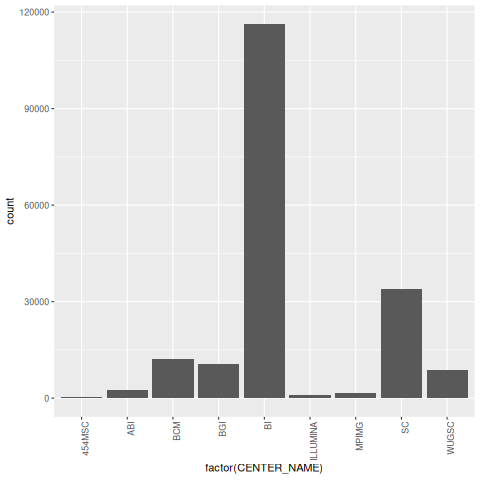

In [77]:
%%R
bar <- ggplot(seq_data) + aes(factor(CENTER_NAME)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
print(bar)